# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.filters import hp_filter

In [2]:
!pip install prophet

In [3]:
from prophet import Prophet

In [4]:
!pip install powerbiclient

# Import PowerBI Library

In [5]:
import powerbiclient

In [6]:
print(powerbiclient.__version__)

3.0.0


In [7]:
from powerbiclient import QuickVisualize, get_dataset_config, Report

In [8]:
!pip install Django

In [9]:
from django.contrib import auth

# Import PowerBI Authentication for Sign In

In [10]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [13]:
device_auth = DeviceCodeLoginAuthentication()
#click on the link and enter the code 

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code HHAR8VVAZ to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


# Load the Dataset

In [14]:
df=pd.read_csv("NSE_BANKING_SECTOR.csv")
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41231 entries, 0 to 41230
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                41231 non-null  object 
 1   SYMBOL              41231 non-null  object 
 2   SERIES              41231 non-null  object 
 3   PREV CLOSE          41231 non-null  float64
 4   OPEN                41231 non-null  float64
 5   HIGH                41231 non-null  float64
 6   LOW                 41231 non-null  float64
 7   LAST                41231 non-null  float64
 8   CLOSE               41231 non-null  float64
 9   VWAP                41231 non-null  float64
 10  VOLUME              41231 non-null  int64  
 11  TURNOVER            41231 non-null  float64
 12  TRADES              41231 non-null  int64  
 13  DELIVERABLE VOLUME  41231 non-null  int64  
 14  %DELIVERBLE         41231 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.7+

In [16]:
df.columns

Index(['DATE', 'SYMBOL', 'SERIES', 'PREV CLOSE', 'OPEN', 'HIGH', 'LOW', 'LAST',
       'CLOSE', 'VWAP', 'VOLUME', 'TURNOVER', 'TRADES', 'DELIVERABLE VOLUME',
       '%DELIVERBLE'],
      dtype='object')

In [17]:
df.describe()

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
count,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,41231.000000
mean,291.962753,292.350947,296.518484,287.723448,291.993606,292.013088,292.160731,1.042650e+07,1.953615e+14,5.221812e+04,3.026935e+06,0.415416
std,452.541028,452.967892,458.224757,447.069432,452.717343,452.732064,452.655314,2.953972e+07,4.038675e+14,8.851021e+04,9.387528e+06,0.196122
min,4.900000,4.950000,4.950000,4.800000,4.900000,4.900000,4.910000,9.194000e+03,1.681628e+10,9.400000e+01,7.392000e+03,0.020100
25%,37.150000,37.300000,37.975000,36.450000,37.100000,37.100000,37.230000,8.216770e+05,5.730684e+12,5.398000e+03,3.457530e+05,0.252700
50%,101.900000,102.000000,103.800000,99.800000,101.750000,101.850000,102.020000,2.777826e+06,4.025961e+13,1.928000e+04,9.584380e+05,0.414700
75%,305.675000,306.125000,311.400000,301.050000,305.775000,305.675000,306.280000,9.769572e+06,2.041632e+14,6.297200e+04,2.928749e+06,0.563200
max,2860.450000,2871.000000,2896.000000,2838.000000,2861.550000,2860.450000,2867.920000,1.264918e+09,1.498222e+16,1.788274e+06,7.870864e+08,1.000000


In [18]:
PBI_visualize = QuickVisualize(get_dataset_config(df), auth=device_auth)

In [19]:
print(PBI_visualize)

QuickVisualize()


In [20]:
dataset_config = get_dataset_config(df)

# Create a QuickVisualize object and pass in the dataset configuration and authentication parameters

In [21]:
visualize = QuickVisualize(dataset_config, auth=device_auth)

In [22]:
print(PBI_visualize)

QuickVisualize()


In [29]:
dataset_config = get_dataset_config(df)

In [30]:
visualize = QuickVisualize(dataset_config, auth=device_auth)

# PowerBI visualization

In [31]:
visualize

QuickVisualize()

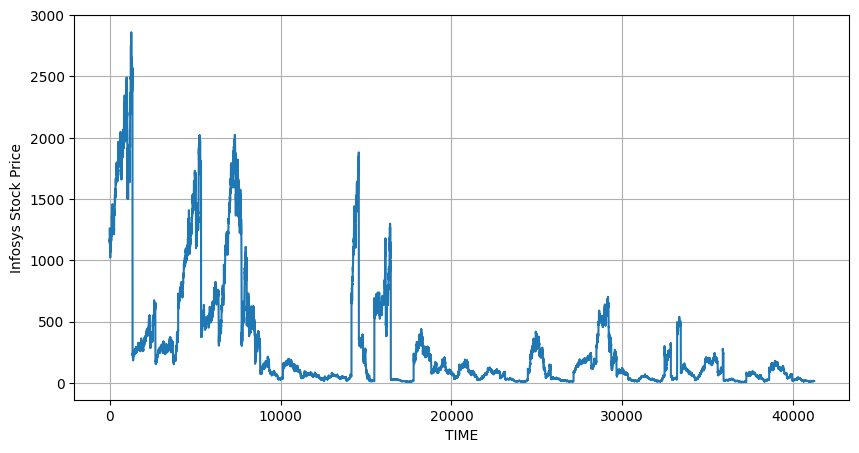

In [26]:
plt.figure(figsize=(10,5))
df['CLOSE'].plot()
plt.xlabel('TIME')
plt.ylabel('Infosys Stock Price')
plt.grid()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

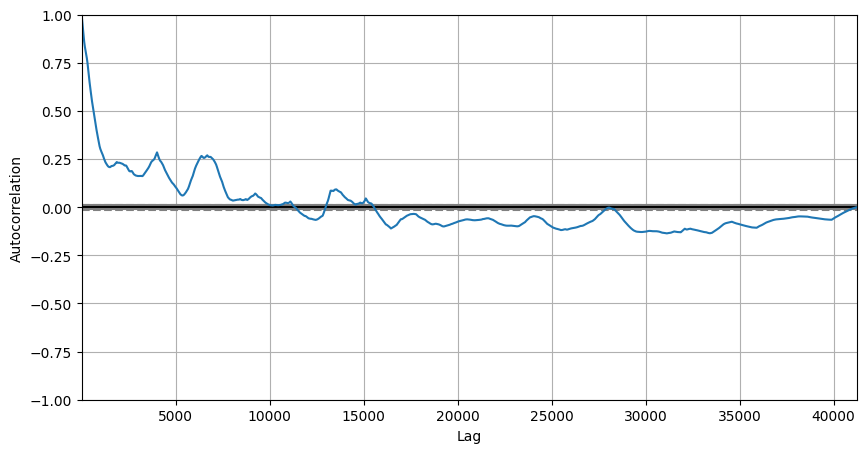

In [32]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(df['CLOSE'])

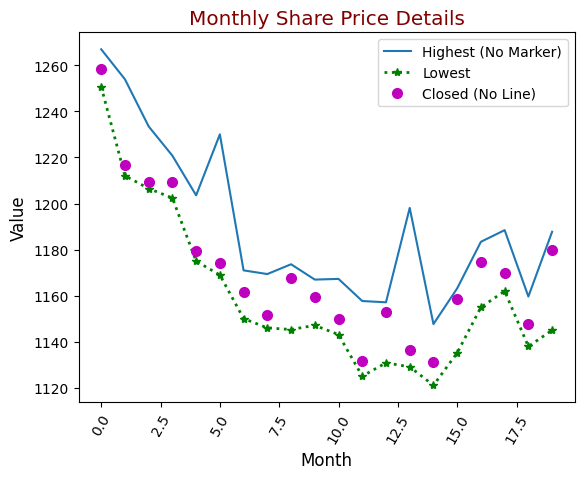

In [33]:
sample_stock = df.iloc[:20,:] # First 20 months stocks Prices details only to show clearly

plt.plot(sample_stock['HIGH'],label='Highest (No Marker)') # default attributes
plt.plot(sample_stock['LOW'],label='Lowest',ls='dotted',color='green',lw=2,marker='*') 
plt.plot(sample_stock['CLOSE'],label='Closed (No Line)',linestyle='none',marker='o',color='m',markersize=7)

plt.xlabel('Month',size='large')
plt.ylabel('Value',size='large')
plt.xticks(rotation=60)
plt.title('Monthly Share Price Details',size='x-large',color='maroon')

plt.legend()
plt.show()